In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def block_diagonal(a, b, c, d):
    n = len(d)
    
    b_ = np.zeros(a.shape)
    c_ = np.zeros(a.shape)
    d_ = np.zeros((n,2,1))

    c_[0] = np.linalg.inv(b[0]).dot(c[0]) 
    d_[0] = np.linalg.inv(b[0]).dot(d[0]) 
    
    for i in range(1,n):
        b_[i] = b[i] - a[i].dot(c_[i-1])
        c_[i] = np.linalg.inv(b_[i]).dot(c[i])
        d_[i] = np.linalg.inv(b_[i]).dot((d[i] - a[i].dot(d_[i-1])))
    
    for i in range(n-2, -1, -1):
        d_[i] = d_[i] - c_[i].dot(d_[i+1])

    return d_

In [3]:
ya = yb = 0
xa = 0
xb = 1
h=0.05

In [4]:
def solver(xa,xb,ya,yb,h):
    n = int((xb - xa)/h)
    a = np.zeros((n-1,2,2))
    b = np.zeros((n-1,2,2))
    c = np.zeros((n-1,2,2))
    d = np.zeros((n-1,2,1))

    for i in range(n-1):
        # As i starts from 0, we define x = l + (i+1)*h
        x = xa+(i+1)*h             
        a[i] = np.array(([[0,0],[-2.0/h, h/3.0 ]]))
        b[i] = np.array(([[1 - 2.0/h, 1-2*h/3.0],[1 + 2.0/h, 1+2*(h/3.0)]]))
        c[i] = np.array(([[2.0/h, -h/3.0],[0, 0]]))
        d[i] = np.array(([[30*(x)],[30*x]]))
        if i == 0:
            d[i] =  d[i] + np.array(([[0],[ya*(2.0/h)-(h/(3-2.0*h))*(30*xa-(1-2.0/h)*ya)]]))
            a[i] = np.array(([[0,0],[0,0]]))
            b[i] = b[i] + np.array(([[0, 0],[-2.0/(3-2*h), h**2/(9-6.0*h)]]))
                                  

    d[n-2] =  d[n-2] + np.array(([[[yb*(-2.0/h)+(h/(3+2.0*h))*(30*xb-(1+2.0/h)*yb)],[0]]]))
    c[n-2] = np.array(([[0,0],[0,0]]))
    b[n-2] = b[n-2] + np.array(([[-2.0/(3+2*h), h**2/(9+6.0*h)],[0, 0]]))

    w = block_diagonal(a, b, c, d)
    y = np.concatenate(([ya],w[:,0,0],[yb]))
    x = np.linspace(xa,xb,(xb-xa)/h+1)
    return x,y

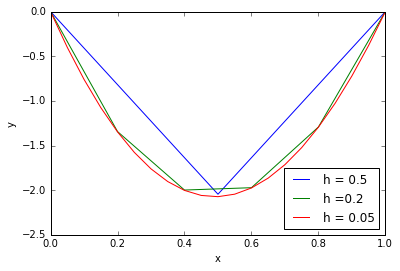

In [9]:
X1,Y1 = solver(xa,xb,ya,yb,0.5)
X2,Y2 = solver(xa,xb,ya,yb,0.2)
X3,Y3 = solver(xa,xb,ya,yb,0.05)


plt.ylabel('y')
plt.xlabel('x')
   
p1, p2, p3 = plt.plot(X3, np.interp(X3, X1, Y1), 
                          X3, np.interp(X3, X2, Y2), X3, Y3)
    
plt.legend([p1, (p1, p2), (p1,p2,p3)], ["h = 0.5", "h =0.2", "h = 0.05"], loc =4)
  
plt.show()